<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Deep_Learning_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import cv2
import numpy
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [42]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/1_keras_fashion_mnist_neural_net/'

1_keras_fashion_mnist.ipynb  Exercise		     fmnist.png  Slide2.PNG
classlabels.JPG		     fashion_neural_net.png  Slide1.PNG


In [44]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
len(x_train)

60000

In [46]:
len(x_test)

10000

In [47]:
x_train[0].shape # check the shape of the array

(28, 28)

In [48]:
x_train[0] # actually checking out the array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

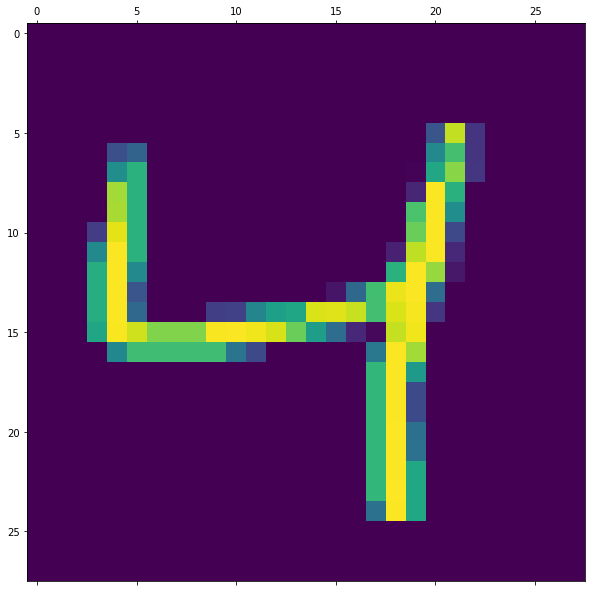

In [49]:
plt.matshow(x_train[2])

In [50]:
y_train[2]

4

In [51]:
x_train = x_train/255
x_test = x_test/255

In [52]:
# first we will have to flatten the dataset
x_train_flatten = x_train.reshape(len(x_train),28*28) # we are multiplying by 28 * 28 as we have the grid of 28x28 and we want all 60k images in train to get flatten

In [53]:
x_train_flatten.shape

(60000, 784)

In [54]:
# first we will have to flatten the dataset
x_test_flatten = x_test.reshape(len(x_test),28*28) # we are multiplying by 28 * 28 as we have the grid of 28x28 and we want all 10k images in test to get flatten

In [55]:
x_test_flatten.shape

(10000, 784)

In [56]:
model = keras.Sequential([ keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')]) # simple neural network with no hidden layer

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [59]:
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2585 - accuracy: 0.9287
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9288
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2530 - accuracy: 0.9296
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2512 - accuracy: 0.9305


In [60]:
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

313/313 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9262


[0.26568838953971863, 0.9261999726295471]

In [73]:
np.argmax(model.predict(x_test_flatten[[100]]).round(2)) # np.argmax is used for getting the maximum value in the array, 
                                                       #round is used to round up to 2 decimal points 

6

In [72]:
y_test[100]

6

In [74]:
y_predicted = model.predict(x_test_flatten)

In [75]:
y_pred= [np.argmax(i) for i in y_predicted]

In [ ]:
y_pred

In [79]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    7,    8,    2,    1,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   4,    8,  918,   18,    8,    5,   15,   10,   43,    3],
       [   2,    0,   16,  923,    1,   23,    3,   10,   26,    6],
       [   1,    1,    4,    2,  917,    0,   10,    4,   11,   32],
       [   9,    2,    1,   33,   10,  785,   12,    8,   27,    5],
       [   8,    3,    4,    1,    7,   16,  914,    2,    3,    0],
       [   1,    6,   21,    7,    7,    1,    0,  951,    2,   32],
       [   5,    6,    6,   20,    9,   28,    9,   11,  873,    7],
       [  10,    6,    1,    8,   33,    6,    0,   21,   10,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

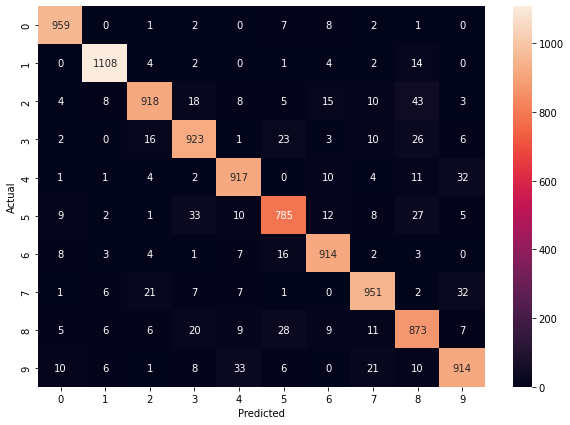

In [84]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [81]:
model = keras.Sequential([ keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1286 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9843


In [82]:
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9742


[0.09065032005310059, 0.9742000102996826]

In [85]:
y_predicted = model.predict(x_test_flatten)
y_pred= [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Actual')

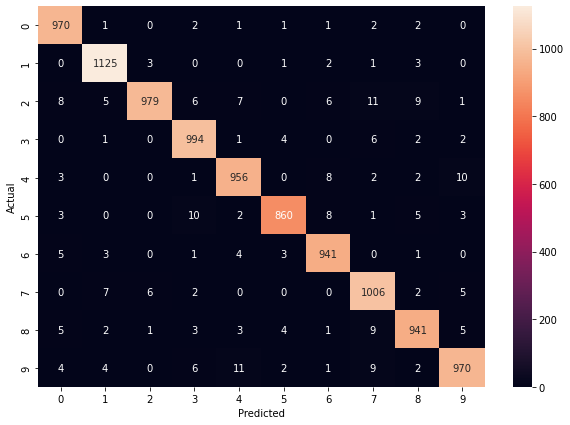

In [86]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred )
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ***For Using the flatten function in keras instead of manually flatting the images***

In [88]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1245 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0862 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0660 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9841


In exercise please try different optimizers and loss functions
